In [1]:
from utils.gmsh_function import *
from src.radiation_algorithm.radiation_algorithm import *
from utils.frequency_sweep import *

In [2]:
mesh_name = "strip_gmsh.msh"
save_mesh_folder = 'data/gmsh_files/'
radiate_strip_mat_gmsh = 'data/antennas_mesh/radiate_strip_gmsh.mat'
radiate_strip_msh_gmsh = save_mesh_folder + mesh_name

In [3]:

gmsh.initialize()
model_name  = "strip_antenna"
longueur = 20 / 1000
hauteur = 2
print(f"Longueur: {longueur} m, Hauteur: {hauteur} m")
feed_point = [0, 0, 0]

# Création du modèle
gmsh.model.add(model_name)
strip_antenna = gmsh.model.occ.addRectangle(-longueur / 2, -hauteur / 2, 0, longueur, hauteur)

apply_mesh_size(longueur*5)

gmsh.model.mesh.generate(2)
# run()

write(save_mesh_folder, mesh_name)

gmsh.finalize()

extract_msh_to_mat(radiate_strip_msh_gmsh, radiate_strip_mat_gmsh)

Longueur: 0.02 m, Hauteur: 2 m


radiate_strip_msh_gmsh = create_antenna_surface(create_strip, feed_point, feed_lenght, angle, meshSize, mesh_name, save_mesh_folder, high_current_points_list=np.array([3, 0]), iteration=0)

extract_radiation_msh_to_mat(radiate_strip_msh_gmsh, mesh_name, radiate_strip_mat_gmsh)

impedance, current_strip = radiation_algorithm(radiate_strip_mat_gmsh, 75e6, feed_point)

Simulation 1/301 | f = 60.00 MHz | S11 = -2.06 dB
Simulation 2/301 | f = 60.10 MHz | S11 = -2.10 dB
Simulation 3/301 | f = 60.20 MHz | S11 = -2.14 dB
Simulation 4/301 | f = 60.30 MHz | S11 = -2.18 dB
Simulation 5/301 | f = 60.40 MHz | S11 = -2.22 dB
Simulation 6/301 | f = 60.50 MHz | S11 = -2.27 dB
Simulation 7/301 | f = 60.60 MHz | S11 = -2.31 dB
Simulation 8/301 | f = 60.70 MHz | S11 = -2.35 dB
Simulation 9/301 | f = 60.80 MHz | S11 = -2.40 dB
Simulation 10/301 | f = 60.90 MHz | S11 = -2.45 dB
Simulation 11/301 | f = 61.00 MHz | S11 = -2.49 dB
Simulation 12/301 | f = 61.10 MHz | S11 = -2.54 dB
Simulation 13/301 | f = 61.20 MHz | S11 = -2.59 dB
Simulation 14/301 | f = 61.30 MHz | S11 = -2.64 dB
Simulation 15/301 | f = 61.40 MHz | S11 = -2.70 dB
Simulation 16/301 | f = 61.50 MHz | S11 = -2.75 dB
Simulation 17/301 | f = 61.60 MHz | S11 = -2.80 dB
Simulation 18/301 | f = 61.70 MHz | S11 = -2.86 dB
Simulation 19/301 | f = 61.80 MHz | S11 = -2.92 dB
Simulation 20/301 | f = 61.90 MHz | S11 

Simulation 151/301 | f = 75.00 MHz | S11 = -8.22 dB
Simulation 152/301 | f = 75.10 MHz | S11 = -8.10 dB
Simulation 153/301 | f = 75.20 MHz | S11 = -7.98 dB
Simulation 154/301 | f = 75.30 MHz | S11 = -7.87 dB
Simulation 155/301 | f = 75.40 MHz | S11 = -7.75 dB
Simulation 156/301 | f = 75.50 MHz | S11 = -7.64 dB
Simulation 157/301 | f = 75.60 MHz | S11 = -7.53 dB
Simulation 158/301 | f = 75.70 MHz | S11 = -7.42 dB
Simulation 159/301 | f = 75.80 MHz | S11 = -7.32 dB
Simulation 160/301 | f = 75.90 MHz | S11 = -7.22 dB
Simulation 161/301 | f = 76.00 MHz | S11 = -7.12 dB
Simulation 162/301 | f = 76.10 MHz | S11 = -7.02 dB
Simulation 163/301 | f = 76.20 MHz | S11 = -6.92 dB
Simulation 164/301 | f = 76.30 MHz | S11 = -6.83 dB
Simulation 165/301 | f = 76.40 MHz | S11 = -6.74 dB
Simulation 166/301 | f = 76.50 MHz | S11 = -6.65 dB
Simulation 167/301 | f = 76.60 MHz | S11 = -6.56 dB
Simulation 168/301 | f = 76.70 MHz | S11 = -6.47 dB
Simulation 169/301 | f = 76.80 MHz | S11 = -6.39 dB
Simulation 1

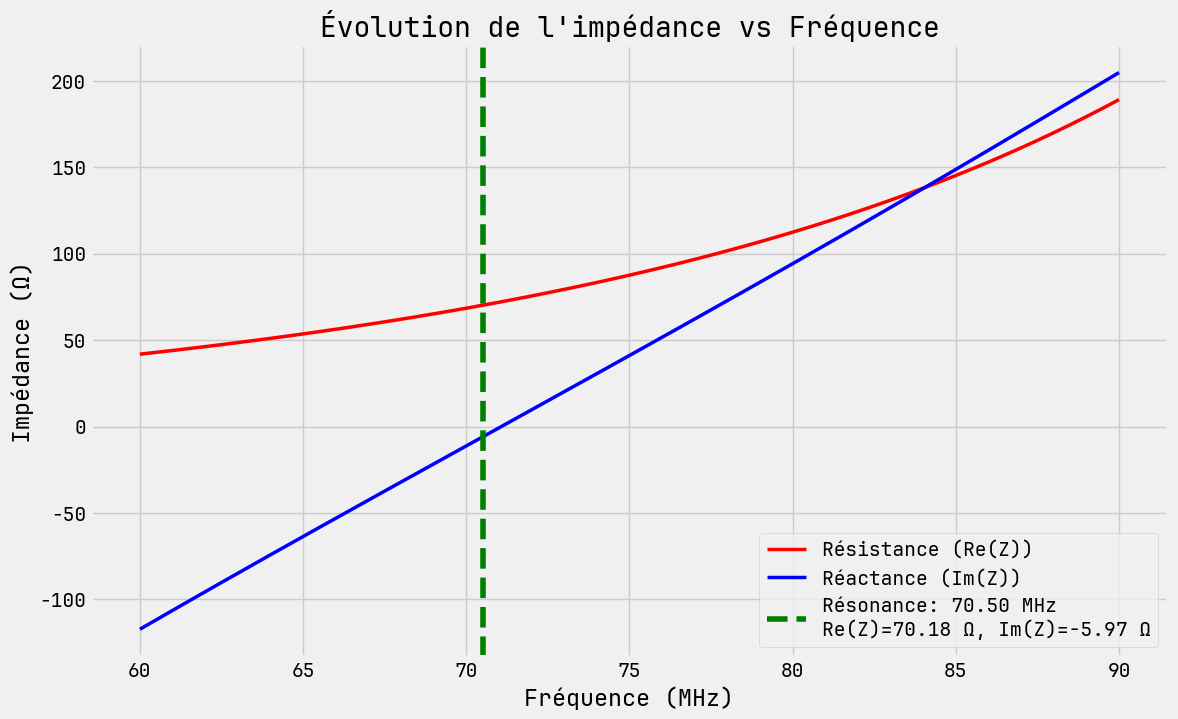


Résultats de simulation :
→ Fréquence de résonance = 70.50 MHz
→ Impédance à f_res      = 70.18-5.97j Ω


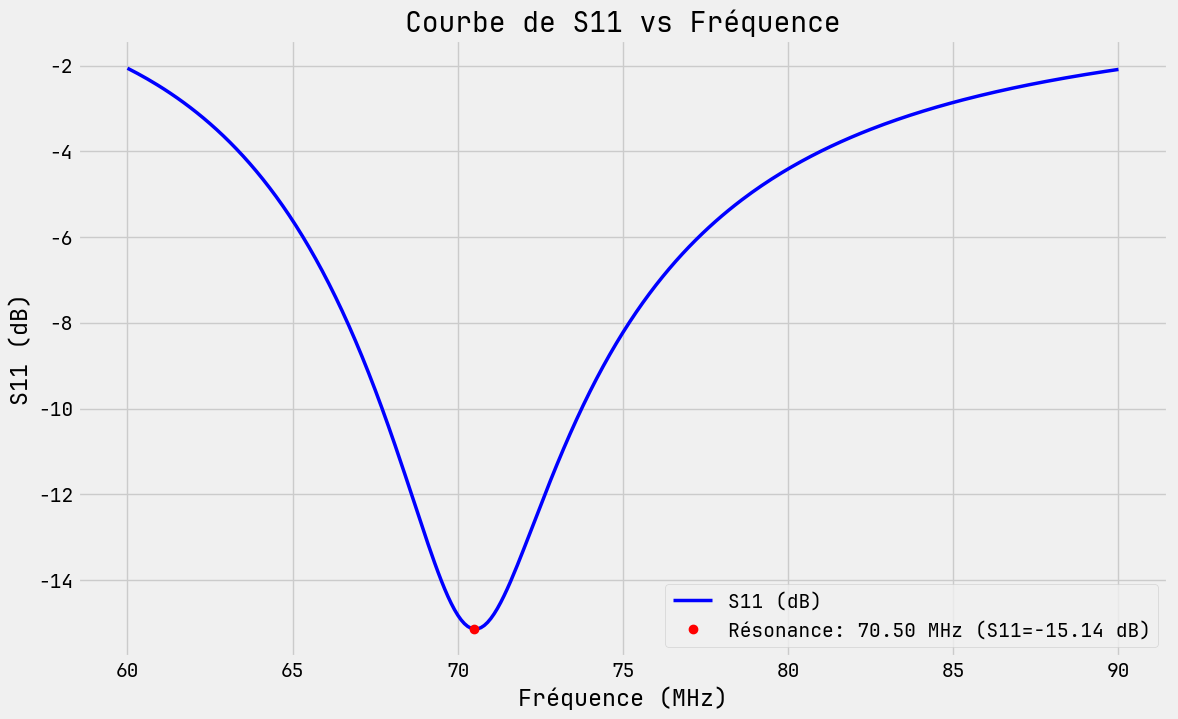

In [4]:
f_resonance, s11_db, R_res, X_res = frequency_sweep(radiate_strip_mat_gmsh, 60e6, 75e6, 90e6, feed_point)
plot_s11_curve(s11_db, 60e6, 90e6)

In [5]:
# Charger les données CST
cst_data_1 = np.loadtxt("data/plot_file/Plot_S11_strip.txt", skiprows=3)
cst_freq_mhz = cst_data_1[:, 0]  # fréquence déjà en MHz
cst_s11_db = cst_data_1[:, 1]

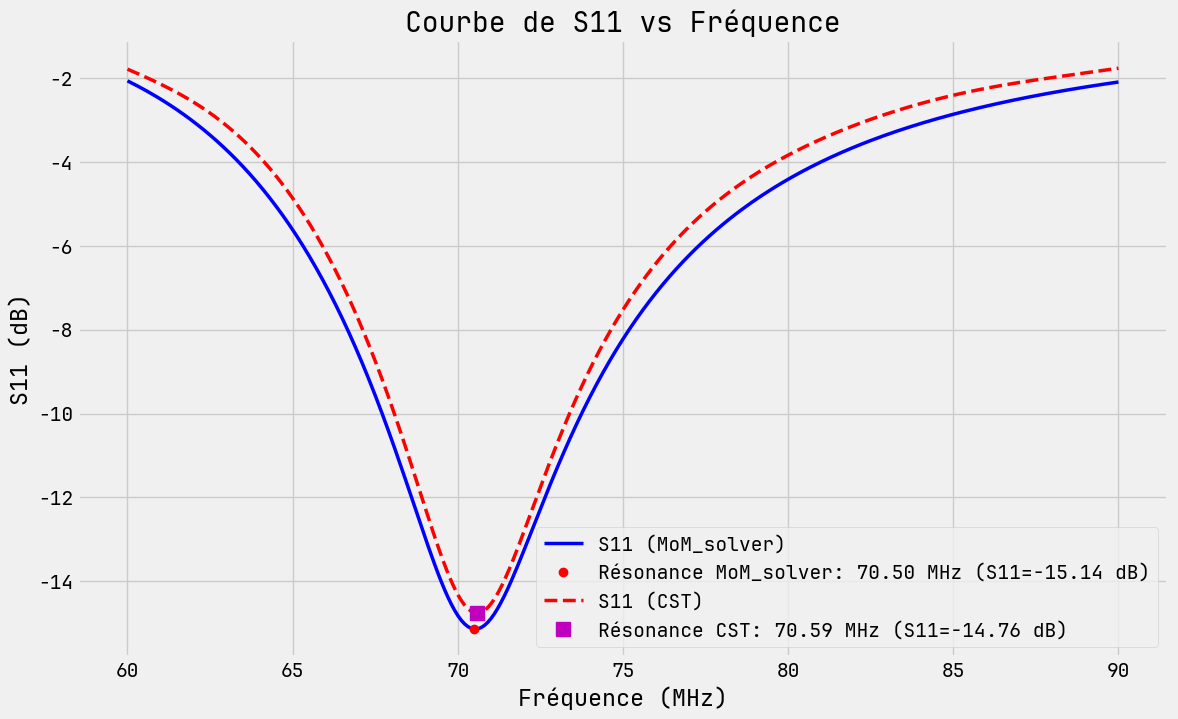

In [6]:
plot_s11_curve_CST_MoM(s11_db, 60e6, 90e6, cst_freq_mhz=cst_freq_mhz, cst_s11_db=cst_s11_db)